In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

# Loading the dataset

In [2]:
path = '/content/healthcare-dataset-stroke-dataset.csv'
data = pd.read_csv(path)

In [3]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# **Data Preprocessing**

In [4]:
data['bmi'] = data['bmi'].apply(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

<ipython-input-4-ebbcec87974c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


# OneHotEncode 'smoking_status'

In [5]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_smoking_status = pd.DataFrame(encoder.fit_transform(data[['smoking_status']]), columns=encoder.get_feature_names_out(['smoking_status']))
data = pd.concat([data, encoded_smoking_status], axis=1)
data.drop(['smoking_status'], axis=1, inplace=True)

# Normalizing 'avg_glucose_level'

In [6]:
scaler = MinMaxScaler()
data['avg_glucose_level'] = scaler.fit_transform(data[['avg_glucose_level']])

# Filtering out non-numeric columns

In [7]:
numeric_data = data.select_dtypes(include=[np.number])

# Exploratory Data Analysis

## Distribution of Average Glucose Level by Stroke Status

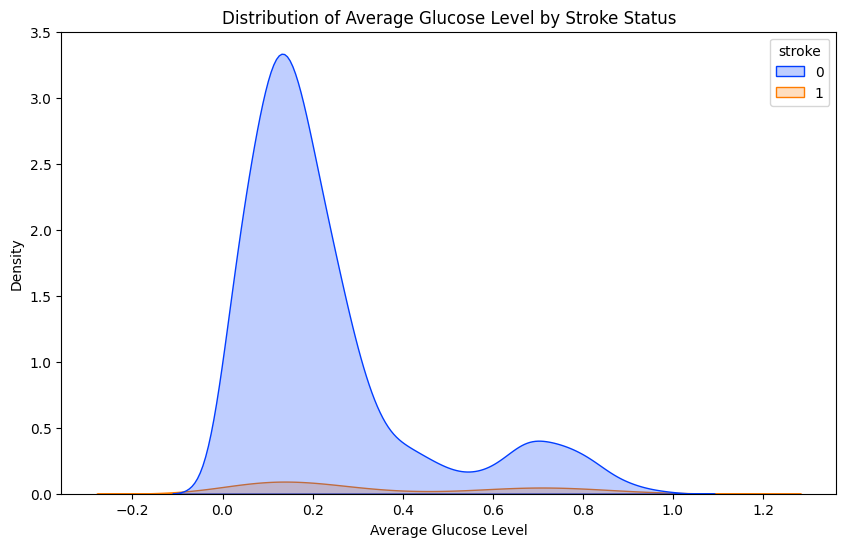

In [8]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='avg_glucose_level', hue='stroke', fill=True, palette='bright')
plt.title('Distribution of Average Glucose Level by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()

#  Distribution of Stroke Cases by Gender

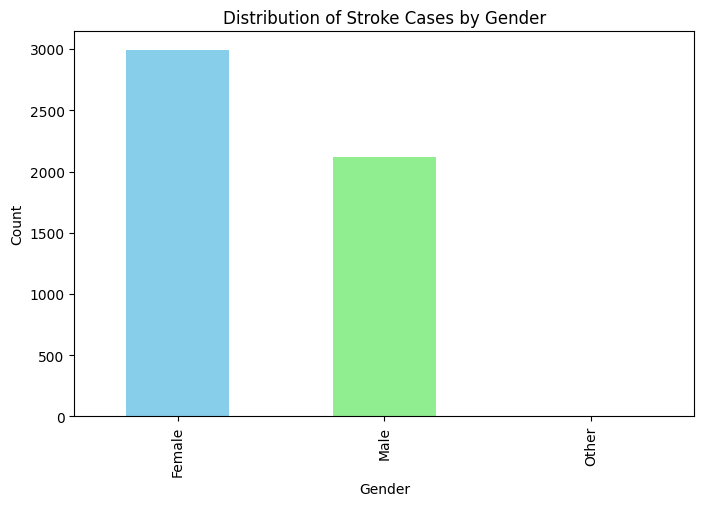

In [9]:

plt.figure(figsize=(8, 5))
data['gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Age Distribution of Stroke Cases

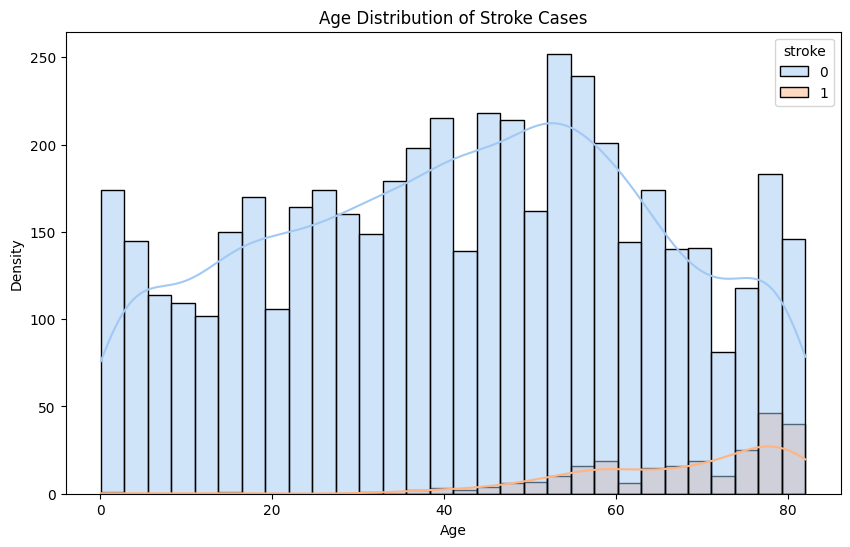

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='stroke', kde=True, palette='pastel', bins=30)
plt.title('Age Distribution of Stroke Cases')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()



# BMI Distribution by Stroke Status

<ipython-input-11-2720a0af3727>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=data, palette='coolwarm')


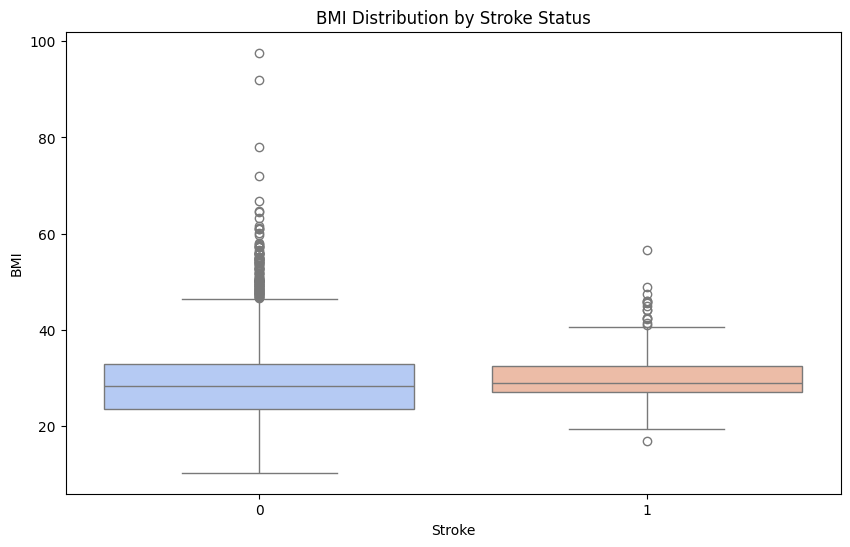

In [11]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=data, palette='coolwarm')
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

# Stroke Proportion by Age Group

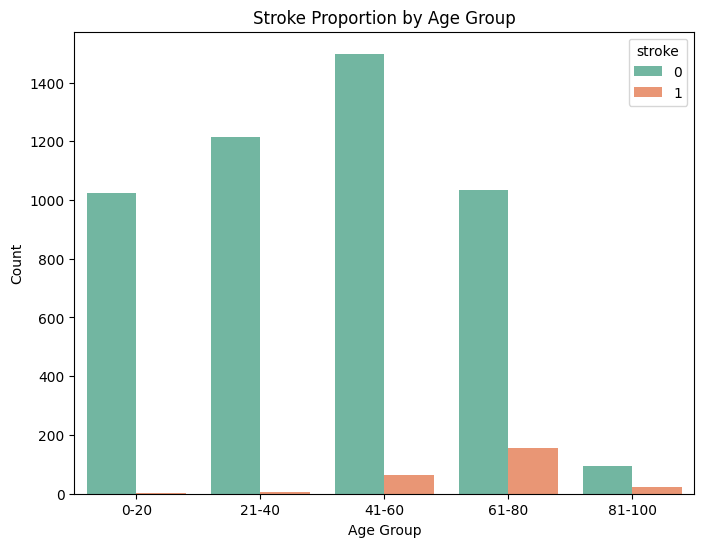

In [12]:

data['age_group'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='stroke', data=data, palette='Set2')
plt.title('Stroke Proportion by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

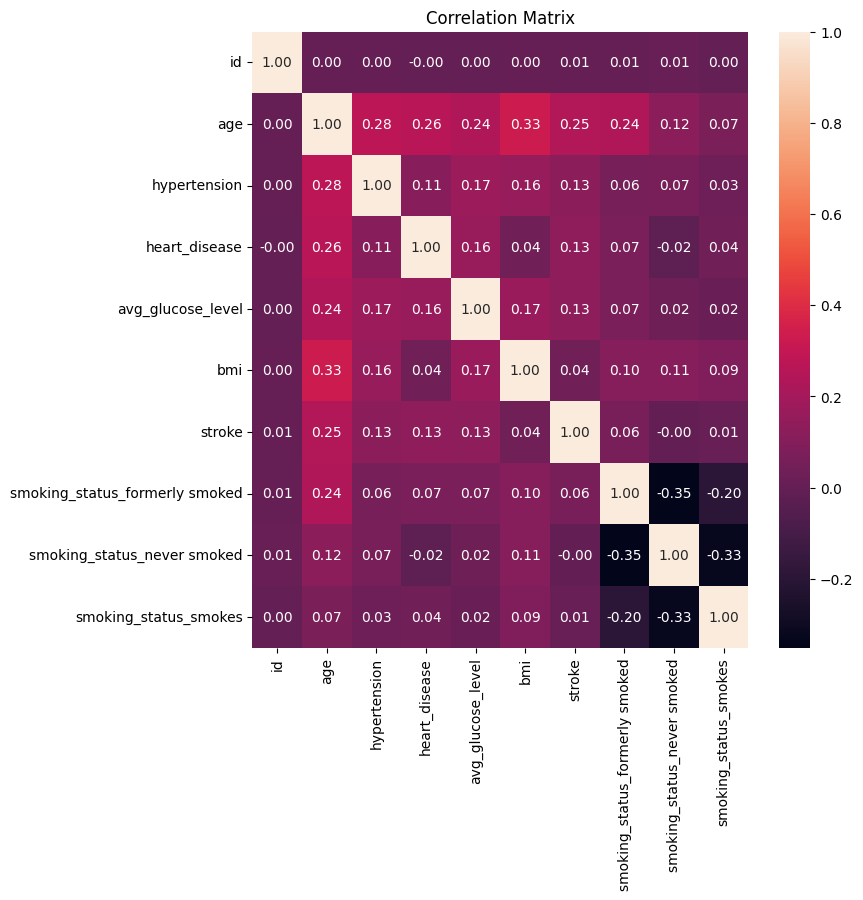

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Modelling**

# Selecting features and target variable

In [14]:
features = ['age', 'avg_glucose_level', 'bmi'] + list(encoded_smoking_status.columns)
X = data[features]
y = data['stroke']

# Splitting the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Random Forest Classifier

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"Random Forest Training Time: {rf_training_time:.4f} seconds")


Random Forest Classifier:
Accuracy: 0.9412915851272016
Confusion Matrix:
 [[1441    3]
 [  87    2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.40      0.02      0.04        89

    accuracy                           0.94      1533
   macro avg       0.67      0.51      0.51      1533
weighted avg       0.91      0.94      0.92      1533

Random Forest Training Time: 0.6378 seconds


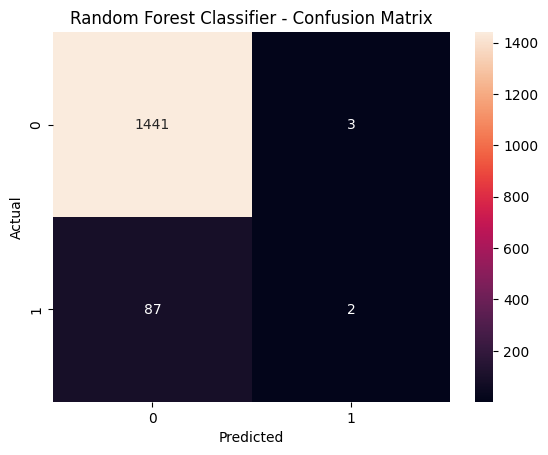

In [21]:
# Confusion Matrix Plot for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine (SVM) Classifier

In [22]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
start_time = time.time()
svm_model.fit(X_train, y_train)
svm_training_time = time.time() - start_time

y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print(f"SVM Training Time: {svm_training_time:.4f} seconds")



Support Vector Machine Classifier:
Accuracy: 0.9419439008480104
Confusion Matrix:
 [[1444    0]
 [  89    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

SVM Training Time: 1.6262 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


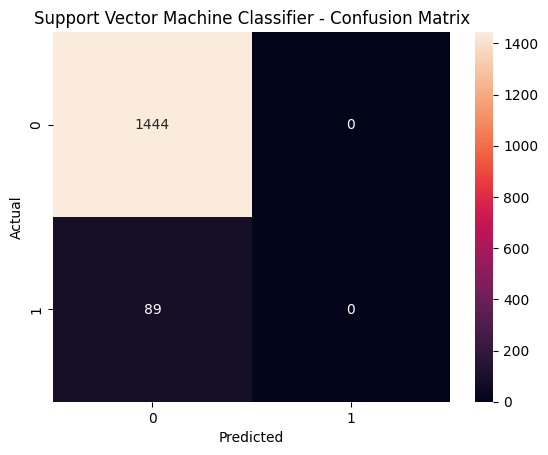

In [23]:
# Confusion Matrix Plot for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')
plt.title('Support Vector Machine Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Comparison

<ipython-input-19-7407edaede4b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette=colors)
<ipython-input-19-7407edaede4b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=training_times, palette=colors)


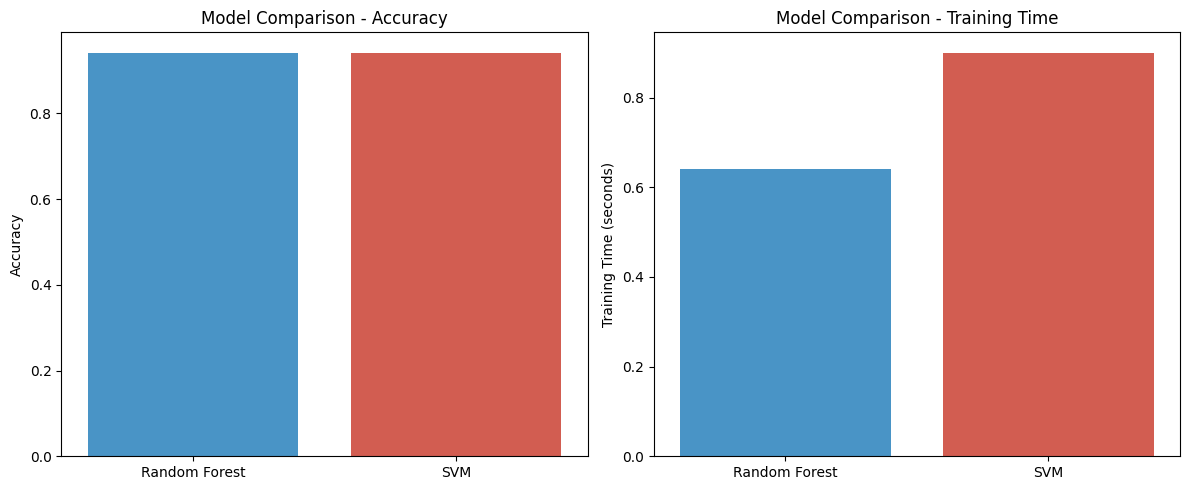

In [19]:
model_names = ['Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)]
training_times = [rf_training_time, svm_training_time]

colors = ['#3498db', '#e74c3c']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=accuracies, palette=colors)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=training_times, palette=colors)
plt.title('Model Comparison - Training Time')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()
